<a href="https://colab.research.google.com/github/baileymccluresinger/PUS2024_BSinger/blob/main/HW4/HW4_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Assignment 1: Walking Speed Linear Regression**
---

###**Data**
---

In [2]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/fedhere/PUS2024/main/data/walkingspeed_Bettencourt07.csv",
                   header=None, names=["population", "wspeed", "city"])

In [3]:
df

,population,wspeed,city
0,2520.0,2.28,NaN
1,370.0,2.79,NaN
2,5650.0,3.37,NaN
3,14100.0,3.76,NaN
4,23300.0,3.31,NaN
5,52600.0,4.91,NaN
6,73300.0,4.40,NaN
7,77100.0,3.90,NaN
8,145000.0,4.40,NaN
9,320000.0,4.49,NaN


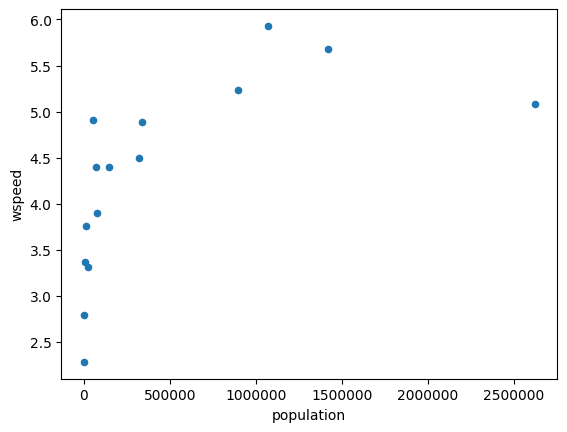

In [4]:
# make a plot of the walking speed (y) vs population (x)
ax = df.plot("population", "wspeed", kind="scatter")
ax.ticklabel_format(style='plain')
ax.set_xlabel("population");

#####**Figure 1.1** A dataset of walking speed values as a function of population size is shown. The relationship appears to be monotonically increasing on both variables; however, it is not linear.

#####The points do not distribute in a line pattern in this space: the linear relationship is predicted in log normal space, which means we expect a linear relationship between the walking speed and the logarithm (base 10) of the population.

In [5]:
#create a logaritmic exogenous variable (x)
import numpy as np
df["population"] = np.log10(df.population)

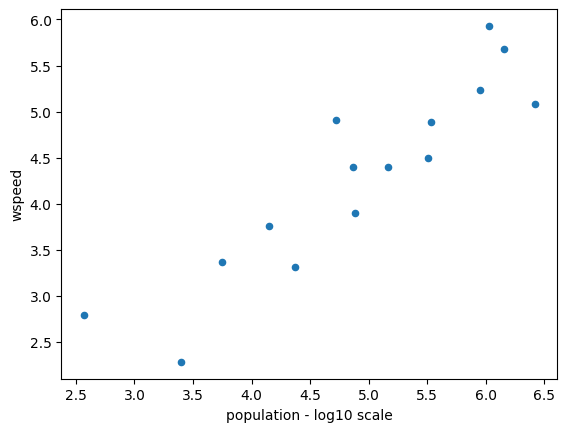

In [6]:
ax = df.plot("population", "wspeed", kind="scatter")
ax.set_xlabel("population - log10 scale");

#####**Figure 1.2** Same plot as above but in a linear-log scale. The data shows a potentially linear relationship between walking spead and log10 population.

###**Plotting with Seaborn**
---

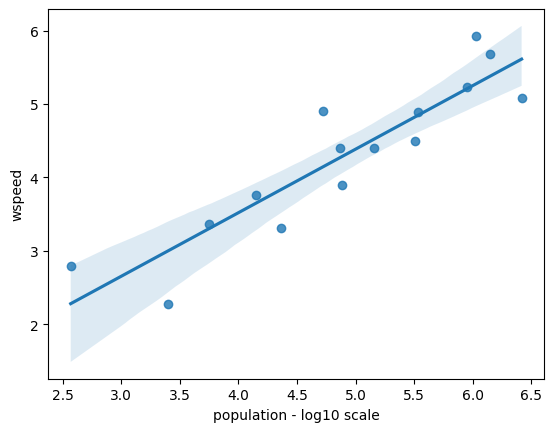

In [7]:
import seaborn as sns
ax = sns.regplot(x=df['population'], y=df['wspeed'])
ax.set_xlabel("population - log10 scale");

#####**Figure 1.3** A linear fit to the data in Figure 1.1 and 1.2 performed with seaborn. The plot shows the linear fit best model and the model uncertainty.



##**Four Main Ways to Fit a Line to Data with Python**
---

###**1. Minimizing an Objective Function Directly *by Hand***
---

In [8]:
# make a function for the model (a line)
def line(x, slope, intercept):
  ''' generates y values for a line for a set of x values with a given slope and intercept
  Input:
  x : series of numbers (vector): the x axis or support
  slope: the slope of the line (float or interger)
  intercept: the intercept of the line (float or interger)
  '''
  return slope * x + intercept

In [9]:
# define the objective function: sum squared errors (SSE)
def sumsqerror(y, yp):
  ''' calculates the Sum of the errors squared (SSE) for a model and a set of observations
  Input:
  y : series of numbers (vector): the observations
  yp : series of numbers (vector): the predictions
  '''
  return ((y - yp) ** 2).sum()

In [10]:
minnow = 1e7 #set a high value for the initial solution
for s in np.arange(0, 3, 0.01): # for e set of possible slopes
  for i in np.arange(0, 2.5, 0.01): # for e set of possible intercepts
    prediction = line(df["population"], s, i)
    sse = sumsqerror(df["wspeed"], prediction)
    if sse < minnow: # if I find a bettter solution than the previous ones
      minnow = sse #replace the old solution with the new minimum
      slope_manual, inrercept_manual = s, i #record the corresponding best (for now) slope and intercept

print("best slope {:.2f} and intercept {:.2f}".format(slope_manual, inrercept_manual))

best slope 0.87 and intercept 0.03


In [11]:
#store the manual fit predictions in a series in the df
df["prediction_manual"] = line(df["population"], slope_manual, inrercept_manual)
df.head()

,population,wspeed,city,prediction_manual
0,3.401401,2.28,NaN,2.989218
1,2.568202,2.79,NaN,2.264335
2,3.752048,3.37,NaN,3.294282
3,4.149219,3.76,NaN,3.639821
4,4.367356,3.31,NaN,3.829600


In [12]:
print ("the best parameters SSE is {:.2f}".format(sumsqerror(df.wspeed.values, df.prediction_manual.values)))

the best parameters SSE is 2.76


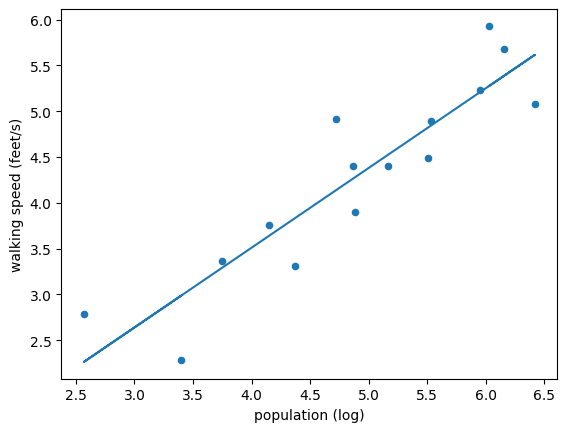

In [13]:
ax = df.plot("population", "wspeed", kind="scatter")
ax.plot(df["population"], df["prediction_manual"]);
ax.set_xlabel("population (log)")
ax.set_ylabel("walking speed (feet/s)");

#####**Figure 1.4** A linear fit to the data in Figure 1.1 and 1.2 performed with brute force minimization of the Sum of Squared Errors (L2) objective function.

###**2. Minimizing an Objective Function *with Numpy***
---

In [14]:
print("best slope {:.2f} and intercept {:.2f}".format(*np.polyfit(df['population'], df['wspeed'], 1)))

best slope 0.87 and intercept 0.06


In [15]:
slope, intercept = np.polyfit(df['population'], df['wspeed'], 1)

# Making predictions from the slope and intercept obtained above
df['prediction_numpy'] = df['population'] * slope + intercept
# Displaying the output
df[['population', 'wspeed', 'prediction_numpy']].head()

,population,wspeed,prediction_numpy
0,3.401401,2.28,3.000010
1,2.568202,2.79,2.279012
2,3.752048,3.37,3.303439
3,4.149219,3.76,3.647126
4,4.367356,3.31,3.835888


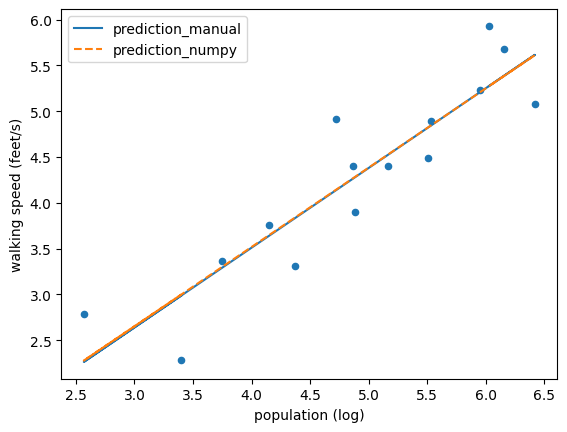

In [16]:
ax = df.plot("population", "wspeed", kind="scatter")
df.plot("population", "prediction_manual", kind="line", ax=ax)
df.plot("population", "prediction_numpy", kind="line", style = ['--'], ax=ax)

ax.set_xlabel("population (log)")
ax.set_ylabel("walking speed (feet/s)");

#####**Figure 1.5** A linear fit to the data in Figure 1.1 and 1.2 performed with brute force minimization (blue) and numpy polyfit (orange); the solutions should overlap as numpy minimizes the L2 to get the result, but the granularity of the Stocastic Gradient Descent numpy solution outperforms the brute force method in precision.

###**3. Minimizing an Objective Function *Using Sklearn***
---

In [17]:
# this is gonna give an error!
from sklearn.linear_model import LinearRegression
#reg = LinearRegression().fit(df["population"], df["wspeed"])

In [18]:
# multiple options to get the right shape for the input (exogenous) variable
#options 1:
# X = df["population"].values.reshape(-1, 1) # this extracts the value arrays from the series and reshapes it to 2D
#options 2:
X = df[["population"]] # this uses a dataframe which contains only 1 column instead of the series
# option 3:
#X = df["population"].values[:,None] # another way to reshape the array from the series
# option 4:
#X = np.atleast_2D(df["population"].values) # another way to reshape the array from the series

In [19]:
## instead of passing df["population"] pass df["population"].values.reshape(-1, 1),
y = df["wspeed"].values
reg = LinearRegression().fit(X,y)
print("score of linear regression from sklearn {:.2f}".format(
    reg.score(X, y)))

score of linear regression from sklearn 0.82


In [20]:
df["prediction_skl"] = reg.predict(X)

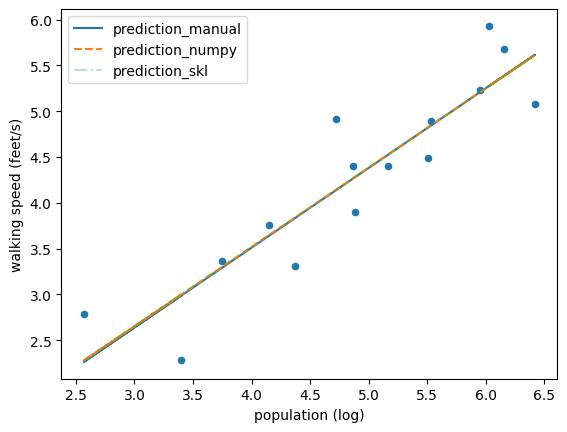

In [21]:
ax = df.plot("population", "wspeed", kind="scatter")
df.plot("population", "prediction_manual", kind="line", ax=ax)
df.plot("population", "prediction_numpy", kind="line", style = ['--'], ax=ax)
df.plot("population", "prediction_skl", kind="line", style = ['-.'], alpha = 0.3,
        ax=ax);

ax.set_xlabel("population (log)")
ax.set_ylabel("walking speed (feet/s)");

#####**Figure 1.6** Same as the numpy polyfit solution in Figure 1.5 but with the scikitlearn LinearRegression solution overplotted.

###**4. Minimizing an Objective Function *Using Statsmodels***
---

####**Line Fit**
---

In [22]:
import statsmodels.api as sm
# Let's declare our X and y variables
X = df['population']
y = df['wspeed']
#same issue as before for the dimensionality of the independent variabl
# With Statsmodels, we need to add our intercept term, B0, manually
X = sm.add_constant(X)
X.head()

,const,population
0,1.0,3.401401
1,1.0,2.568202
2,1.0,3.752048
3,1.0,4.149219
4,1.0,4.367356


In [23]:
model = sm.OLS(endog=y, exog=X)
results = model.fit()
# Show the summary
results.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 wspeed   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     59.90
Date:                Wed, 16 Oct 2024   Prob (F-statistic):           3.21e-06
Time:                        21:41:50   Log-Likelihood:                -8.5829
No. Observations:                  15   AIC:                             21.17
Df Residuals:                      13   BIC:                             22.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0566      0.560      0.101      0.921      -1.154       1.267
population     0.8653      0.112      7.740      0.000       0.624       1.107
==============================================================================
Omnibus:                        0.456   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.796   Jarque-Bera (JB):                0.531
Skew:                           0.115   Prob(JB):                        0.767
Kurtosis:                       2.107   Cond. No.                         24.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

####**Polynomial Degree 2 Fit**
---

In [24]:
#alternative: statsmodel formula that could be useful if you wanted to create more complicated models
import statsmodels.formula.api as smf

In [25]:
mod = smf.ols(formula='wspeed ~ population', data=df)
res = mod.fit()
res.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 wspeed   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     59.90
Date:                Wed, 16 Oct 2024   Prob (F-statistic):           3.21e-06
Time:                        21:41:50   Log-Likelihood:                -8.5829
No. Observations:                  15   AIC:                             21.17
Df Residuals:                      13   BIC:                             22.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0566      0.560      0.101      0.921      -1.154       1.267
population     0.8653      0.112      7.740      0.000       0.624       1.107
==============================================================================
Omnibus:                        0.456   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.796   Jarque-Bera (JB):                0.531
Skew:                           0.115   Prob(JB):                        0.767
Kurtosis:                       2.107   Cond. No.                         24.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
res.predict()

array([3.00001037, 2.27901169, 3.30343936, 3.64712627, 3.83588836,
       4.14189772, 4.26660871, 4.28560323, 4.52297726, 4.8204649 ,
       4.84435204, 5.20740779, 5.61064953, 5.38045839, 5.27410438])

In [27]:
# this is the formula for a second degree polynomial y = ax^2 + bx + c
mod = smf.ols(formula='wspeed ~ I(population**2) + population',
              data=df)
res2 = mod.fit()

res2.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 wspeed   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     28.41
Date:                Wed, 16 Oct 2024   Prob (F-statistic):           2.81e-05
Time:                        21:41:50   Log-Likelihood:                -8.4158
No. Observations:                  15   AIC:                             22.83
Df Residuals:                      12   BIC:                             24.96
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.0889      2.067      0.527      0.608      -3.415       5.593
I(population ** 2)     0.0513      0.099      0.520      0.613      -0.164       0.266
population             0.3916      0.918      0.426      0.677      -1.609       2.392
==============================================================================
Omnibus:                        0.026   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.238
Skew:                           0.051   Prob(JB):                        0.888
Kurtosis:                       2.392   Cond. No.                         507.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

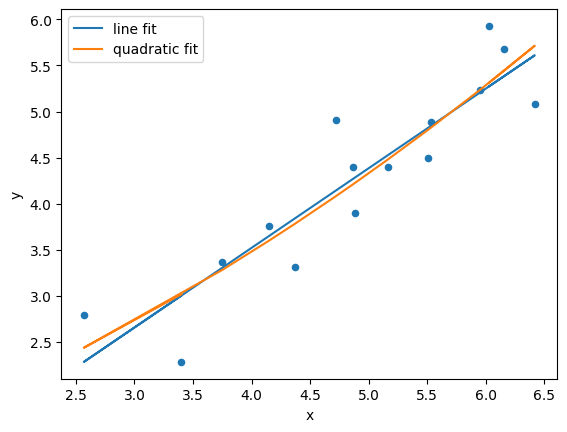

In [28]:
ax = df.plot("population", "wspeed", kind="scatter")
ax.plot(df.population, res.predict(df), label="line fit")
ax.plot(df.population, res2.predict(df), label="quadratic fit")
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y');

#####**Figure 1.7** The data in Figures 1.1 and 1.2 are fit with a first (line, blue) and second degree polynomial (parabola, orange.)

In [29]:
#set your significance threshold
alpha = 0.05

In [30]:
#likelihood rations test, res dataset against res2 [value of restricted parameter]
lr = res2.compare_lr_test(res)

In [31]:
#run a NHRT style fit: the Likelihood Ratio test
print("LR statistics {:.2f}, p-value {:.2f}, degrees of freedom {}".format(
    *lr))

LR statistics 0.33, p-value 0.56, degrees of freedom 1.0


**NULL HYPOTHESIS HERE**

In [32]:
print('Likelihood ration test - we set alpha to alpha={}.\n'.format(alpha))
print('The Null Hypothesis is that the more complex model, the quadratic fit, is better than the simpler model, the linear fit.\n')
print("Since the p-value is GREATER than the p-value threshold we REJECT the Null Hypothesis.")

Likelihood ration test - we set alpha to alpha=0.05.

The Null Hypothesis is that the more complex model, the quadratic fit, is better than the simpler model, the linear fit.

Since the p-value is GREATER than the p-value threshold we REJECT the Null Hypothesis.


###**Quantifying Quality of Fit**
---

In [41]:
res.params

,0
Intercept,0.056649
population,0.865338


In [39]:
res.conf_int()

,0,1
Intercept,-1.153880,1.267177
population,0.623798,1.106878


####**Based on the confidence intervals above, which of Intercept and Population are statistically significant?**

#####The population is statistically significant due to the confidence interval falling within the 95% threshhold and its range maintaining a non-zero value.

###**Influence Points**
---

In [35]:
from statsmodels.stats.outliers_influence import summary_table

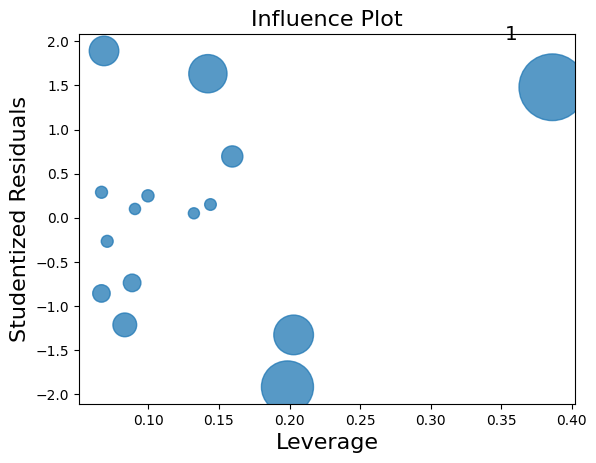

In [36]:
sm.graphics.influence_plot(res);

#####**Figure 1.8** Influence plot for first degree (line) polynomial fit.

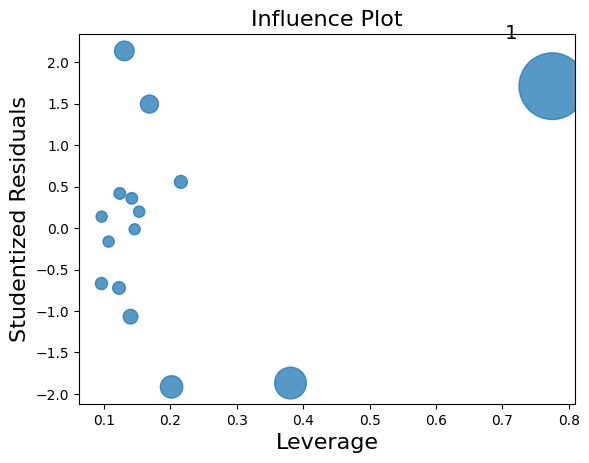

In [37]:
sm.graphics.influence_plot(res2);

#####**Figure 1.9** Influence plot for second degree (parabola) polynomial fit.